# Tensorflow & Pytorch comparison with CIFAR10
> The purpose of this notebook is to layout the typical workflow in a simple feed-forward classification problem using Tensorflow/Keras and Pytorch.

- toc: true 
- badges: true
- comments: true
- categories: [jovian, tensorflow, keras, pytorch, fastpages, jupyter]
- image: images/tf-pytorch-1.png

# About

The third assigment of the course [Pytorch Zero to GANS](https://jovian.ml/forum/c/pytorch-zero-to-gans/18) run by [JOVIAN.ML](https://www.jovian.ml) is to go through a simple classification problem using the CIFAR10 dataset. The course uses Pytorch and as an option course attendees were asked to use Tensorflow to repeat the task.

The training was done on Google Colab with GPU.
The good thing with running on Colab (and Binder, Kaggle to name a few others) is there is not much setup involved. Import the required libraries and off you go!

The Tensorflow version will be done first followed by the Pytorch version. The course assignment was in Pytorch (as the course title suggests) so the TF example was made to match that setup.

# Colab setup
> You will have to use your own API credentials.   

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import os
root_dir = '/content/drive/My Drive/Colab Notebooks/jovian/'

Mounted at /content/drive


# Tensorflow/Keras

## Import libraries

In [0]:
from __future__ import print_function
import tensorflow as tf
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import to_categorical
import os
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

> Data augmentation not used because this was not used in the Pytorch example below. **

In [0]:
batch_size=128
epochs=20
data_augmentation=False

In [8]:
(X,y), (x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


## Explore the CIFAR10 dataset

In [0]:
# collapse-hide
print(X.shape)
print(y.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [0]:
y_squeeze = np.squeeze(y)

In [0]:
# Create a classes list
classes = ['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [11]:
#unique classes
unique_classes = np.unique(y)
num_classes = len(unique_classes)
unique_classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
unique, count = np.unique(y, return_counts=True)

In [0]:
for i in range(len(unique)):
  print(f' class {classes[i] } has {count[i].item()} images')

 class airplane has 5000 images
 class automobile has 5000 images
 class bird has 5000 images
 class cat has 5000 images
 class deer has 5000 images
 class dog has 5000 images
 class frog has 5000 images
 class horse has 5000 images
 class ship has 5000 images
 class truck has 5000 images


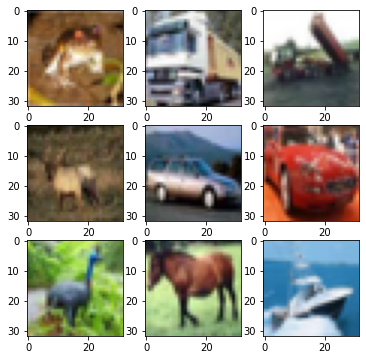

In [13]:
#collapse-hide
fig = plt.figure(figsize=(6,6))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X[i])

plt.show()

## Prepare the data for training
> The Pytorch assignment used a 10% split of the training set for the validation set done using the randome_split Pytorch utility. 
So I will use scikitlearn's train_test_split to do the same the same on the training set.

In [0]:
x_train, x_val, y_train, y_val= train_test_split(X, y,
                                                     test_size=0.1,
                                                     random_state=42)

In [0]:
x_train=x_train.astype('float32')/255.
x_val=x_val.astype('float32')/255.

In [16]:
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
print(x_train.shape)
print(y_train.shape)

(45000, 32, 32, 3)
(45000, 10)


In [0]:
y_train = np.squeeze(y_train)
y_val=np.squeeze(y_val)

## Set up a simple Keras model

In [0]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [19]:
model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                98336     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 98,666
Trainable params: 98,666
Non-trainable params: 0
_________________________________________________________________


> The number of model parameters must match that of Pytorch. 

In [0]:
opt = keras.optimizers.SGD(learning_rate=1e-3)

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics = ['accuracy'])

In [0]:
H = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs = 20,
              validation_data=(x_val,y_val))

In [23]:
print(H.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


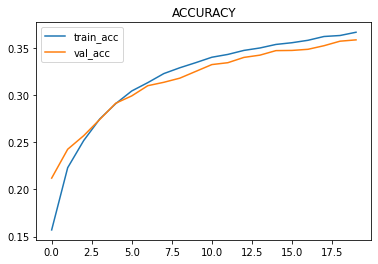

In [25]:
plt.title("ACCURACY")
plt.plot(H.history['accuracy'], label='train_acc')
plt.plot(H.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.show()

## Evaluate the model on Test data

In [0]:
x_test =x_test.astype('float32')/255.
y_test = to_categorical(y_test, num_classes)

In [27]:
y_test.shape

(10000, 10)

In [28]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 94us/step


[1.8181508338928223, 0.3619999885559082]

---

# Pytorch
This is Assignment 03 modified for blogging purposes.

## Import libraries

In [0]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline

In [0]:
# Project name used for jovian.commit
project_name = '03-cifar10-feedforward'

In [4]:
proj_dir = os.path.join(root_dir, project_name)
proj_dir

'/content/drive/My Drive/Colab Notebooks/jovian/03-cifar10-feedforward'

## Exploring the CIFAR10 dataset

In [5]:
dataset = CIFAR10(root=proj_dir, download=True, transform=ToTensor())

test_dataset = CIFAR10(root=proj_dir, train=False, transform=ToTensor())

Files already downloaded and verified


In [6]:
dataset_size = len(dataset)
dataset_size

50000

In [8]:
test_dataset_size = len(test_dataset)
test_dataset_size

10000

In [9]:
classes = dataset.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [10]:
num_classes = len(dataset.classes)
num_classes

10

Note that this dataset consists of 3-channel color images (RGB). Let us look at a sample image from the dataset. `matplotlib` expects channels to be the last dimension of the image tensors (whereas in PyTorch they are the first dimension), so we'll the `.permute` tensor method to shift channels to the last dimension. Let's also print the label for the image.

#### The number of images belonging to each class
[Credit](https://jovian.ml/shravankumar224/03-cifar10-feedforward)

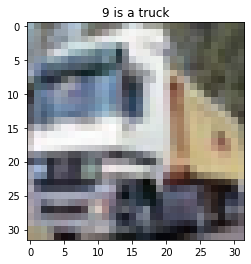

In [11]:
#get the label of the dataset using the [1] index
img, label = dataset[1]
label_of_image_1 = dataset[1][1]
title= str(label_of_image_1) + ' is a ' + classes[label_of_image_1]
plt.imshow(img.permute(1,2,0))
plt.title(title)
plt.show()

In [0]:
label_of_train_images=[]
for i in range(len(dataset)):
  label_of_train_image = dataset[i][1]
  label_of_train_images.append(label_of_train_image)

In [0]:
num_unique_train_labels = np.unique(label_of_train_images)

In [0]:
uniq_image_count = torch.stack([(torch.tensor(label_of_train_images)==i).sum() for i in num_unique_train_labels])

In [15]:
for i in range(len(uniq_image_count)):
  print(f' class {classes[i] } has {uniq_image_count[i].item()} images')

 class airplane has 5000 images
 class automobile has 5000 images
 class bird has 5000 images
 class cat has 5000 images
 class deer has 5000 images
 class dog has 5000 images
 class frog has 5000 images
 class horse has 5000 images
 class ship has 5000 images
 class truck has 5000 images


## Prepare the data for training

In [0]:
torch.manual_seed(43)
val_size = 5000
train_size = len(dataset) - val_size

Let's use the `random_split` method to create the training & validation sets

In [17]:
train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(45000, 5000)

We can now create data loaders to load the data in batches.

In [0]:
batch_size=128

In [0]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size*2, num_workers=4, pin_memory=True)

Let's visualize a batch of data using the `make_grid` helper function from Torchvision.

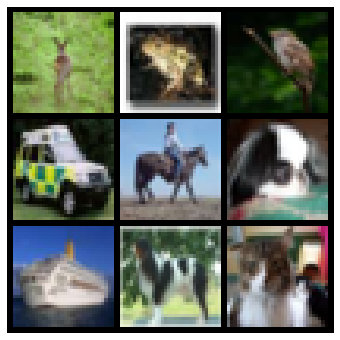

In [20]:
#collapse-hide
viz_loader = DataLoader(train_ds, 9, shuffle=True, num_workers=4, pin_memory=True)
for images, _ in viz_loader:
    plt.figure(figsize=(6,6))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=3).permute((1, 2, 0)))
    break

## Base Model class & Training on GPU

Let's create a base model class, which contains everything except the model architecture i.e. it wil not contain the `__init__` and `__forward__` methods. We will later extend this class to try out different architectures. In fact, you can extend this model to solve any image classification problem.

In [0]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim =1)
  return torch.tensor(torch.sum(preds== labels).item()/len(preds))

In [0]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss 
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss #change from cross_entropy
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

We can also use the exact same training loop as before. I hope you're starting to see the benefits of refactoring our code into reusable functions.

In [0]:
def evaluate(model, val_loader):
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

Finally, let's also define some utilities for moving out data & labels to the GPU, if one is available.

Let us also define a couple of helper functions for plotting the losses & accuracies.

In [0]:
def plot_losses(history):
    losses = [x['val_loss'] for x in history]
    plt.plot(losses, '-x')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Loss vs. No. of epochs');

In [0]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-o')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Pytorch Accuracy vs. No. of epochs');

Let's move our data loaders to the appropriate device.

In [0]:
input_size = 3*32*32
hidden_size = 32
output_size = 10

In [0]:
class CIFAR10Model(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        #dd hidden layer
        self.linear1 = nn.Linear(input_size, hidden_size)
        #output layer
        self.linear2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, xb):
        # Flatten images into vectors
        out = xb.view(xb.size(0), -1)
        # Apply layers & activation functions
        out = self.linear1(out)
        out = F.relu(out)
        out = self.linear2(out)   
        return out

You can now instantiate the model, and move it the appropriate device.

In [28]:
#USING A GPU
torch.cuda.is_available()
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

device = get_default_device()
print(device)

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

for images, labels in train_loader:
    print(images.shape)
    images = to_device(images, device)
    print(images.device)
    break


cuda
torch.Size([128, 3, 32, 32])
cuda:0


In [0]:
model = to_device(CIFAR10Model(), device)

In [30]:
print(model.parameters)
for t in model.parameters():
    print(t.shape)

<bound method Module.parameters of CIFAR10Model(
  (linear1): Linear(in_features=3072, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)>
torch.Size([32, 3072])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


Before you train the model, it's a good idea to check the validation loss & accuracy with the initial set of weights.

In [31]:
#collapse-hide
pytorch_total_params = sum(p.numel() for p in model.parameters())
print('Total number of parameters: ',pytorch_total_params)
pytorch_trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print('Trainable parameters: ', pytorch_trainable_params)
print('layers + activations',len(list(model.parameters())))

Total number of parameters:  98666
Trainable parameters:  98666
layers + activations 4


> ** The number of model parameters matches that of TF/Keras **

In [0]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [0]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)
test_loader= DeviceDataLoader(test_loader, device)

In [41]:
for xb, yb in val_loader:  
    print('xb.device:', xb.device)
    xb = xb.view(xb.size(0), -1)
    break

xb.device: cuda:0


In [42]:
history = [evaluate(model, val_loader)]
history

[{'val_acc': 0.09672564268112183, 'val_loss': 2.308856248855591}]

In [ ]:
history = fit(20, 1e-3, model, train_loader, val_loader)
history

Plot the losses and the accuracies to check if you're starting to hit the limits of how well your model can perform on this dataset. You can train some more if you can see the scope for further improvement.

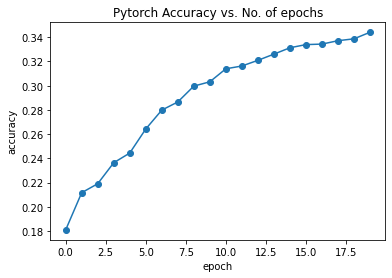

In [47]:
plot_accuracies(history)

## Finally, evaluate the model on the test dataset report its final performance.

In [45]:
evaluate(model, test_loader)

{'val_acc': 0.33740234375, 'val_loss': 1.88686203956604}

# Results

 Accuracy 
     Tensorflow/Keras : 0.3619999885559082
     Pytorch:  0.33740234375

The differences could be due to very little training and hence lack of convergence of the solution, the randomness of the weights intialisation and differences in the library implementations in TF and Pytorch and other stuff I am not aware of ;)

# Concluding comments
This exercise was not to get an exact match of accuracy but to demonstrate the constructs between TF and Pytorch.

The Jovian course [Pytorch Zero to GANS](https://jovian.ml/forum/c/pytorch-zero-to-gans/18) is a great introduction to Machine Learning. I am enjoying
 - Collaborating with others
 - Working through examples
 - Finishing assignments and submitting for approval
 - Blogging about my experiences
 - Staying enthusiastic about ML!

Thanks and appreciation to:
- [Jeremy Howard](https://www.fast.ai/) and Hamel Hussain for the [Fastpages](https://github.com/fastai/fastpages) framework in which this blog is written as a Jupyter notebook.